# Tasty Food Recommender

## Do stworzenia Tasty Food Recommendera (dalej TFR) użyliśmy następujących bibliotek

In [243]:
import pandas as pd # praca na bazie danych
import numpy as np # operacje matematyczne
import random as rn # funkcja sample do wybierania losowych rekordów z bazy
import matplotlib.pyplot as plt # wykresy
import seaborn as sns # wykresy
import time # obliczenie czasu wykonywania kodu

pd.set_option('display.max_rows', 10)

In [244]:
start_time = time.time()

## Przed rozpoczęciem działania algorytmu TFR tworzymy kopię bazy i usuwamy z niej niepotrzebne kolumny

In [245]:
recipesDatabase = pd.read_csv(r"dishes_with_mapped_tags.csv")
recipesDataSetWithNames = recipesDatabase.drop(columns=['index', 'id_', 'slug', 'video_url',
                                                          'thumbnail_url', 'tags', 'cook_time',
                                                          'prep_time', 'total_time', 'ratings_negative',
                                                          'ratings_positive', 'score', 'protein', 'fat',
                                                          'calories', 'sugar', 'carbohydrates', 'fiber'])

### Oczyszczona baza prezentuje się następująco

In [246]:
recipesDataSetWithNames.head()

,name,cooking_style_big_batch,cooking_style_kid_friendly,cooking_style_bake,meal_breakfast,meal_bakery_goods,cuisine_american,meal_drinks,difficulty_5_ingredients_or_less,healthy_low_calorie,...,cuisine_cuban,cuisine_puerto_rican,cuisine_soul_food,cuisine_indigenous,cuisine_laotian,cuisine_hawaiian,method_no_bake_desserts,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
0,Homemade Cinnamon Rolls,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Whipped Coffee,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Fluffy Pancakes,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,How to Make Cinnamon Rolls,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Healthy Banana Pancakes,0,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [247]:
recipesDataSetWithNames.describe()

,cooking_style_big_batch,cooking_style_kid_friendly,cooking_style_bake,meal_breakfast,meal_bakery_goods,cuisine_american,meal_drinks,difficulty_5_ingredients_or_less,healthy_low_calorie,difficulty_easy,...,cuisine_cuban,cuisine_puerto_rican,cuisine_soul_food,cuisine_indigenous,cuisine_laotian,cuisine_hawaiian,method_no_bake_desserts,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.143017,0.345662,0.395203,0.132033,0.106478,0.451020,0.016588,0.121049,0.131809,0.503699,...,0.000448,0.000224,0.0,0.000448,0.000224,0.000672,0.000224,0.000224,0.000224,0.000224
std,0.350130,0.475637,0.488949,0.338565,0.308483,0.497651,0.127737,0.326221,0.338321,0.500042,...,0.021171,0.014972,0.0,0.021171,0.014972,0.025927,0.014972,0.014972,0.014972,0.014972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Następnie implementujemy klasę DataProcessing zawierającą metody:
### pickSample(x, quantity) - wybiera ze zbioru x losowe rekordy w liczbie quantity i zwraca dwa zbiory: sample oraz restOfDatabase, czyli próbkę i resztę zbioru x (bez próbki)
### dropColumns(x, threshold_percentage) - usuwa ze zbioru x kolumny zawierające procent jedynek większy niż zadane threshold_percentage, usuwa kolumny zawierające obiekty (tekst). Zwraca zbiór
### normalization(x) - normalizuje zbiór x normalizacją min-max

In [248]:
class DataProcessing:
    @staticmethod
    def pickSample(x, quantity):
        sample = x.sample(quantity)
        restOfDatabase = x.drop(sample.index)
        
        return sample, restOfDatabase
    
    #TODO: tutaj zmienione ze średniej na skewness (miara asymetrycznośći rozkładu)
    #przy 20 jest prawie tak samo dokładna (prawie zawsze 100%) jak przy 0.03 średniej
    @staticmethod
    def dropColumns(x, skew_threshold):
        x = x.select_dtypes(exclude=["object"])
        
        # Compute skewness for each column
        skewness = x.apply(lambda column: pd.Series.skew(column))

        # Find columns with skewness smaller than threshold
        skewed_columns = skewness[skewness < skew_threshold].index

        # Drop the skewed columns from the DataFrame
        x = x.drop(skewed_columns, axis=1)

        return x
    
    @staticmethod
    def normalization(x):
        data = x
        maximum = max(data)
        minimum = min(data)
        for index in range(0, len(x), 1):
            if maximum != minimum:
             xprim = (x[index] - minimum)/(maximum - minimum)
            else:
             xprim = 0
            x[index] = xprim

## Implementujemy również klasę SoftSet, zawierającą metody:
### meanVector(df) - tworzy wektor średni z wyborów użytkownika poprzez zsumowanie wszystkich elementów z kolumn i podzielenie ich przez długość tych kolumn
### addSumsColumn(restOfDatabase, chosenByUser) - tworzy kolumnę sum stworzonych poprzez mnożenie każdego elementu z kolumn restOfDatabase przez wektor meanVector
### pickRecommendations(restOfDatabase, chosenByUser, quantity) - zwraca pierwsze kilka rekordów (te z najwyższym wynikiem w kolumnie "sums") w liczbie quantity

In [250]:
class SoftSet:
    #tutaj zmieniłem na normalizacje, ale jak wspomniałem to kosmetyka
    @staticmethod
    def sumOfAttributes(df): 
        summedAttributes = []
        for column in df:
            columnValues = df[column].values
            summedAttributes.append(sum(columnValues))
        DataProcessing.normalization(summedAttributes)
        return summedAttributes
    @staticmethod
    def addSumsColumn(restOfDatabase, chosenByUser):
        meanVector = SoftSet.sumOfAttributes(chosenByUser)
        sums = []
        for i in restOfDatabase.values:
            j = 0
            sum = 0
            for element in i:
                sum += element*meanVector[j]
                j += 1
            sums.append(sum)
        return sums
    @staticmethod
    def pickRecommendations(restOfDatabase, chosenByUser, quantity):
        restOfDatabase['sums'] = SoftSet.addSumsColumn(restOfDatabase, chosenByUser)
        restOfDatabase = restOfDatabase.sort_values(by="sums", ascending=False)
        
        return restOfDatabase.iloc[:, :-1].head(quantity)

## Ostatnią klasą jest ShowStatistics, która zawiera metody:
### reorderColumns(x) - przesuwa ostatnią kolumnę zbioru na początek
### calculateAccuracy(chosenByUser, recommendations) - oblicza dokładność między wektorem średnim z wyborów użytkownika i wektorem średnim z wyborów Recommendera
### showVectorPlot(chosenByUser, recommendations) - tworzy wykres pokazując graficznie wektory średnie wyborów użytkownika i Recommendera oraz różnicę między nimi

In [251]:
class ShowStatistics:
    @staticmethod
    def reorderColumns(x):
        cols = x.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        return x[cols]
    @staticmethod
    def calculateAccuracy(chosenByUser, recommendations):
        meanVector = SoftSet.sumOfAttributes(chosenByUser)
        recommendationsSetMeanVector = SoftSet.sumOfAttributes(recommendations)
        vector = np.abs(np.subtract(meanVector, recommendationsSetMeanVector))
        acc = sum(vector)/len(vector)
        acc = 1 - acc
        return acc
    @staticmethod
    def showVectorPlot(chosenByUser, recommendations):
        meanVector = SoftSet.sumOfAttributes(chosenByUser)
        recommendationsSetMeanVector = SoftSet.sumOfAttributes(recommendations)
        vector = np.abs(np.subtract(meanVector, recommendationsSetMeanVector))

        # Data for meanVector
        x = np.arange(0, len(meanVector))
        y_mean = np.array(meanVector)

        # Data for validatingSetMeanVector
        y_validating = np.array(recommendationsSetMeanVector)
        
        y_vector = np.array(vector)
        
        sns.reset_orig()

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.title("User choices vs TFR recommendations")
        plt.xlabel("Number of categories")
        plt.ylabel("Sums")
        plt.ylim(0, 1)
        plt.plot(x, y_mean, color="#ff7f0e", linestyle='dashed', label="User choices")
        plt.plot(x, y_validating, color="#2ca02c", linestyle='dashed', label="TFR recommendations")
        plt.plot(x, y_vector, color="#1f77b4", label="absolute")
        plt.legend()
        plt.show()

### Najpierw usuwamy kolumny zawierające dane w formacie tekstowym i te zawierające więcej niż 3% jedynek i wyświetlamy 5 pierwszych rekordów tego zbioru poniżej:

In [252]:
df = recipesDataSetWithNames.copy()
df = DataProcessing.dropColumns(df, 20)
#save to csv
df.to_csv('dishes_with_mapped_tags.csv', index=False)
df.head()

# df = df.select_dtypes(exclude=["object"])

,cuisine_african,cuisine_dominican,cuisine_caribbean,cuisine_filipino,cuisine_taiwanese,cuisine_jamaican,meal_brunch,cuisine_swedish,cuisine_west_african,cuisine_vietnamese,...,cuisine_ethiopian,cuisine_cuban,cuisine_puerto_rican,cuisine_indigenous,cuisine_laotian,cuisine_hawaiian,method_no_bake_desserts,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rozpoczyna się działanie algorytmu

### Dzielimy zbiór na dwa zbiory chosenByUser, restOfDatabase, przy czym pierwszy jest losową próbką 40 rekordów. Wyświetlamy tenże zbiór poniżej:

In [253]:
chosenByUser, restOfDataSet = DataProcessing.pickSample(df, 40)

In [254]:
chosenByUserWithNames = chosenByUser.copy()
chosenByUserWithNames['name'] = recipesDataSetWithNames['name']
print("Recipes chosen by the user:")
ShowStatistics.reorderColumns(chosenByUserWithNames)

Recipes chosen by the user:


,name,cuisine_african,cuisine_dominican,cuisine_caribbean,cuisine_filipino,cuisine_taiwanese,cuisine_jamaican,meal_brunch,cuisine_swedish,cuisine_west_african,...,cuisine_ethiopian,cuisine_cuban,cuisine_puerto_rican,cuisine_indigenous,cuisine_laotian,cuisine_hawaiian,method_no_bake_desserts,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
2420,Chocolate-Stuffed Churro Donuts,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2752,S’mores Macarons,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,Chicken Alfredo Lasagna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,Sausage Gravy–Stuffed Biscuits,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3199,4-Ingredient Kiwi-Strawberry Fruit Leathers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,The Best Chocolate Cake,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Zucchini And Corn Frittata,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3348,Three-Layer Peanut Butter Brownies,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1648,Caprese Chicken Parmesan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Wyszukujemy z reszty zbioru 40 rekordów, które będą naszymi rekomendacjami, wyświetlamy pierwsze 5 rekordów poniżej:

In [255]:
recommendations = SoftSet.pickRecommendations(restOfDataSet, chosenByUser, 40)

In [256]:
recommendationsWithNames = recommendations.copy()
recommendationsWithNames['name'] = recipesDataSetWithNames['name']
print("Recipes chosen by the recommender:")
ShowStatistics.reorderColumns(recommendationsWithNames).head()

Recipes chosen by the recommender:


,name,cuisine_african,cuisine_dominican,cuisine_caribbean,cuisine_filipino,cuisine_taiwanese,cuisine_jamaican,meal_brunch,cuisine_swedish,cuisine_west_african,...,cuisine_ethiopian,cuisine_cuban,cuisine_puerto_rican,cuisine_indigenous,cuisine_laotian,cuisine_hawaiian,method_no_bake_desserts,cuisine_lebanese,cuisine_south_african,cuisine_venezuelan
0,Homemade Cinnamon Rolls,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2974,Gooey 'Box' Brownie Mud Hen Bars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2980,Paleo Flourless Chocolate Torte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2979,Apricot Dumplings,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2978,Classic Basque Cheesecake,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Na koniec obliczamy dokładność rekomendacji porównując średnie wektory ze zbiorów chosenByUser oraz recommendations:

In [257]:
acc = ShowStatistics.calculateAccuracy(chosenByUser, recommendations)
print("The accuracy is", round(acc*100, 2), "%")

The accuracy is 100.0 %


In [258]:
# to_be_dropped = []
# to_be_dropped_dict = {}
# acc_by_run = acc
# acc_for_column = 0
# while acc_by_run > acc_for_column:
#     for column in restOfDataSet.columns:
#         restOfDataSet_copy = restOfDataSet.copy()
#         chosenByUser_copy = chosenByUser.copy()
#         restOfDataSet_copy = restOfDataSet_copy.drop("sums", axis=1)
#         chosenByUser_copy = chosenByUser_copy.drop(column, axis=1)
#         restOfDataSet_copy = restOfDataSet_copy.drop(column, axis=1)
#         recommendations = SoftSet.pickRecommendations(restOfDataSet_copy, chosenByUser, 40)
#         acc_for_column = ShowStatistics.calculateAccuracy(chosenByUser_copy, recommendations)
#         if acc_by_run < acc_for_column:
#             acc_by_run = acc_for_column
#             to_be_dropped.append(column)
#             # to_be_dropped_dict[column] = acc_for_column

#     restOfDataSet = restOfDataSet.drop(column, axis=1)
#     chosenByUser = chosenByUser.drop(column, axis=1)   
# display(to_be_dropped_dict)
    

In [259]:
# to_be_dropped

In [260]:
# len(df.columns)

In [261]:
# restOfDataSet_copy = restOfDataSet.drop(to_be_dropped, axis=1)
# chosenByUser_copy = chosenByUser.drop(to_be_dropped, axis=1)
# restOfDataSet_copy = restOfDataSet_copy.drop("sums", axis=1)
# recommendations = SoftSet.pickRecommendations(restOfDataSet_copy, chosenByUser, 40)
# acc_for_column = ShowStatistics.calculateAccuracy(chosenByUser_copy, recommendations)
# display(acc_for_column)

In [262]:
# restOfDataSet_copy = restOfDataSet.copy()
# chosenByUser_copy = chosenByUser.copy()
# restOfDataSet_copy = restOfDataSet_copy.drop("sums", axis=1)
# recommendations = SoftSet.pickRecommendations(restOfDataSet_copy, chosenByUser, 40)
# acc_for_column = ShowStatistics.calculateAccuracy(chosenByUser_copy, recommendations)
# display(acc_for_column)

In [263]:
# length = len(to_be_dropped)
# length

### Dodatkowo tworzymy jeszcze wykres ukazujący porównanie wyborów użytkownika z TFR:

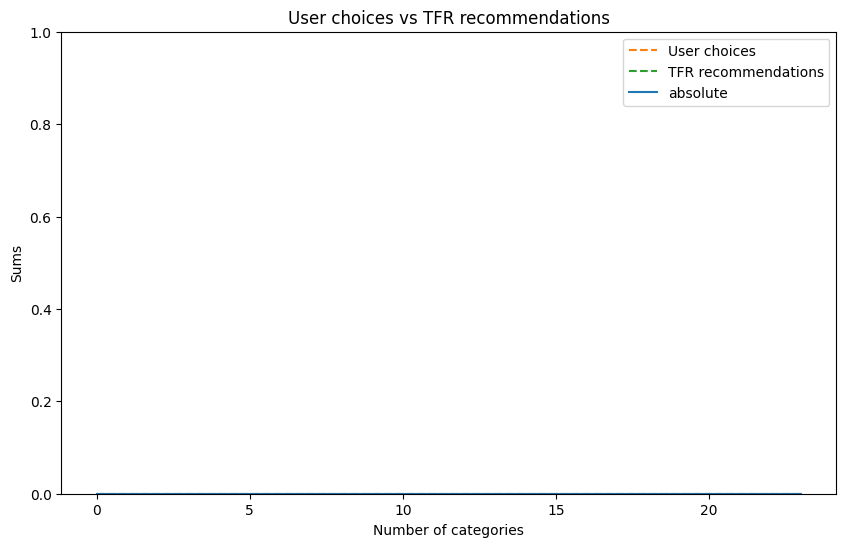

In [264]:
ShowStatistics.showVectorPlot(chosenByUser, recommendations)

### Czas wykonania kodu po całym jednym uruchomieniu to...

In [265]:
end_time = time.time()
elapsed_time = end_time - start_time
print("Code execution time: {:.2f} seconds".format(elapsed_time))

Code execution time: 3.98 seconds
